In [15]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hayde\Downloads\College Affordability Final.csv")
x = df[ ["S_F_Ratio", "Accept_Rate", "All_Cost"] ]
y = df[['Grad_Rate']]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df.head()

,Unnamed: 0,S_F_Ratio,Accept_Rate,All_Cost,Grad_Rate
0,Abilene Christian University,18.1,74.22,59.50,60
1,Adelphi University,12.2,88.01,87.00,56
2,Adrian College,12.9,76.82,53.15,54
3,Agnes Scott College,7.7,83.69,67.75,59
4,Alaska Pacific University,11.9,75.65,64.20,15


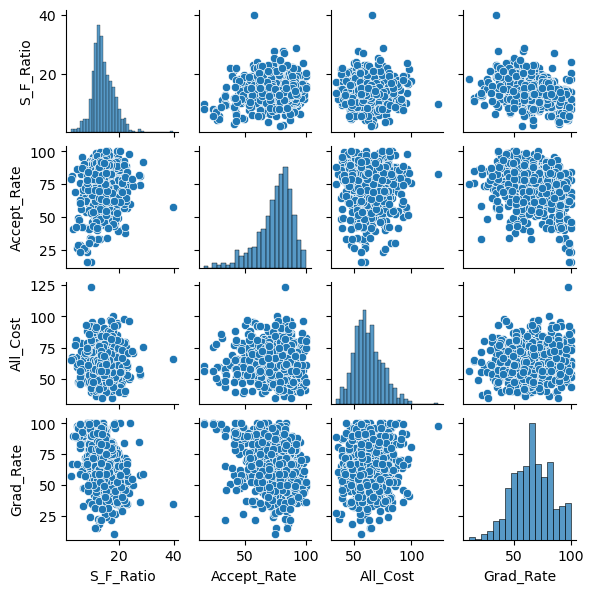

In [5]:
sns.pairplot(df, height=1.5)
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

vif_data["VIF"] = [ variance_inflation_factor(x.values ,i) for i in range(x.shape[1] )  ]
vif_data

,Feature,VIF
0,S_F_Ratio,11.875814
1,Accept_Rate,17.152732
2,All_Cost,15.561796


In [9]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'Grad_Rate ~ S_F_Ratio + Accept_Rate + All_Cost', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad_Rate   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     52.28
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           9.10e-31
Time:                        14:20:25   Log-Likelihood:                -3231.3
No. Observations:                 776   AIC:                             6471.
Df Residuals:                     772   BIC:                             6489.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      98.4090      4.458     22.074      0.000      89.657     107.161
S_F_Ratio      -1.2090      0.142     -8.491      0.000      -1.489      -0.930
Accept_Rate    -0.3024      0.038     -7.887      0.000      -0.378      -0.227
All_Cost        0.1057      0.046      2.293      0.022       0.015       0.196
==============================================================================
Omnibus:                       22.692   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.403
Skew:                          -0.390   Prob(JB):                     5.02e-06
Kurtosis:                       3.384   Cond. No.                         790.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='All_Cost', ylabel='Grad_Rate'>

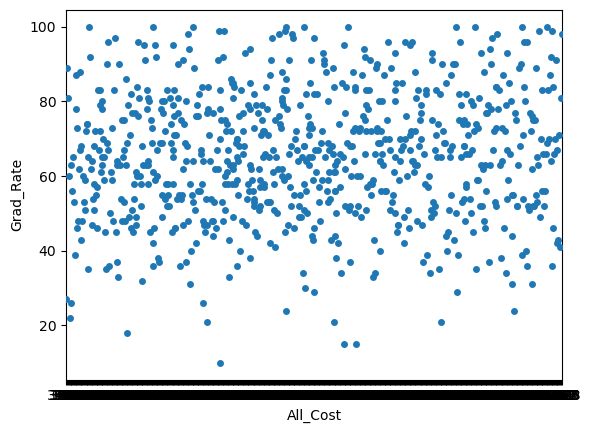

In [11]:
sns.stripplot(x="All_Cost", y="Grad_Rate", data=df)

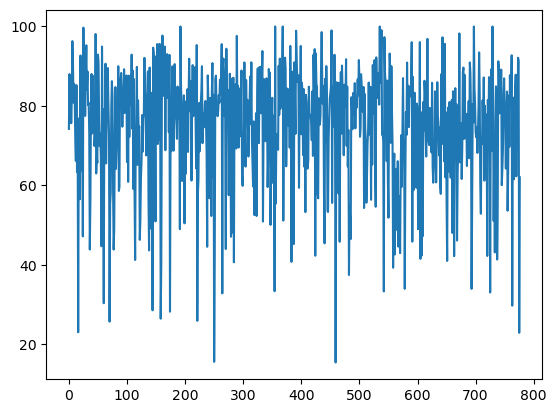

In [19]:
x_point = df[['Accept_Rate']]
plt.plot(x_point)

<Axes: >

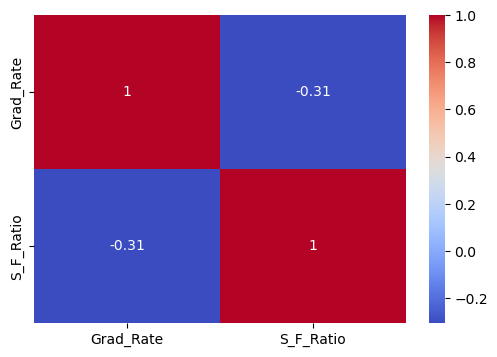

In [29]:
correlation = df[['Grad_Rate', 'S_F_Ratio']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)

<Axes: xlabel='All_Cost', ylabel='Count'>

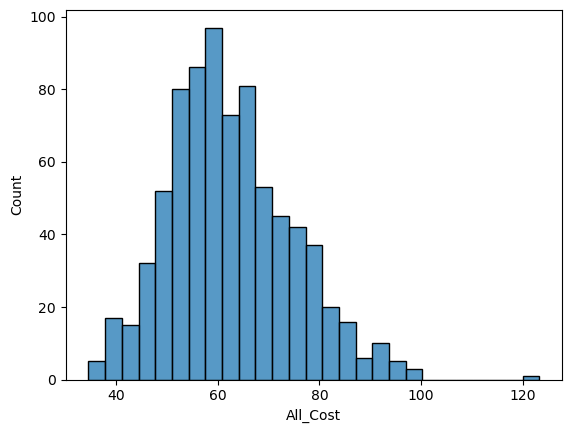

In [17]:
sns.histplot(data=df, x="All_Cost")